<a href="https://colab.research.google.com/github/HamidBekamiri/Econometrics-II/blob/main/RNN_LSTM_PyTorch_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape: (2336, 1)
Validation data shape: (585, 1)
Testing data shape: (731, 1)
X_train shape: (2329, 7, 1)
y_train shape: (2329, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.1024 - mean_absolute_error: 0.2244 - val_loss: 0.0064 - val_mean_absolute_error: 0.0646
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0052 - mean_absolute_error: 0.0569 - val_loss: 0.0041 - val_mean_absolute_error: 0.0516
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0040 - mean_absolute_error: 0.0503 - val_loss: 0.0042 - val_mean_absolute_error: 0.0518
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0041 - mean_absolute_error: 0.0509 - val_loss: 0.0042 - val_mean_absolute_error: 0.0520
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0039 - mean_absolute_error: 0.0499 - val_loss: 0.0040 - val_mean_absolute_error: 0.0510
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0040 - mean_absolute_error: 0.0505 - val_loss: 0.0045 - val_mean_absolute_error: 0.0540
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - mean_absolute_error: 0.0512 - va

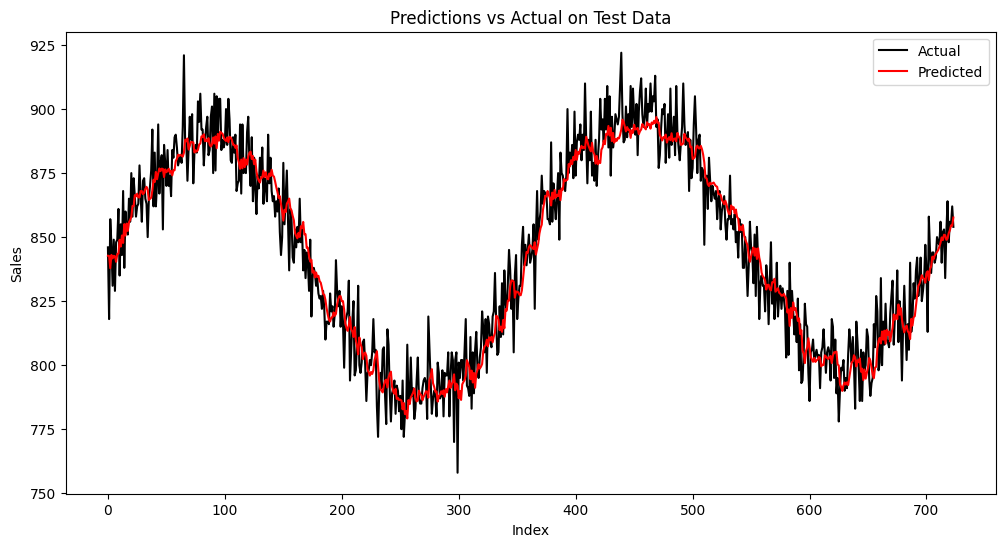

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,653 (10.37 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
# Load the data
url = "https://raw.githubusercontent.com/deepshamenghani/time-series-regression-tidymodels/main/data/timeseries_data_single_storeproduct.csv"
df = pd.read_csv(url)
df = df[['sales']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Step 2: Split the Data into Training and Testing Sets
# Determine split indices
train_size = int(len(df_scaled) * 0.8)
train_data = df_scaled[:train_size]
test_data = df_scaled[train_size:]

# Further split the training data into training and validation sets
train_valid_size = int(len(train_data) * 0.8)
train_data_final = train_data[:train_valid_size]
valid_data = train_data[train_valid_size:]

print(f"Training data shape: {train_data_final.shape}")
print(f"Validation data shape: {valid_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Step 3: Prepare Data for RNN Input
def create_sequences(data, n_timesteps):
    X = []
    y = []
    for i in range(len(data) - n_timesteps):
        X.append(data[i:i + n_timesteps])
        y.append(data[i + n_timesteps])
    return np.array(X), np.array(y)

n_timesteps = 7
n_features = 1

# Create sequences for training, validation, and testing
X_train, y_train = create_sequences(train_data_final, n_timesteps)
X_valid, y_valid = create_sequences(valid_data, n_timesteps)
X_test, y_test = create_sequences(test_data, n_timesteps)

# Reshape inputs to 3D (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], n_timesteps, n_features))
X_valid = X_valid.reshape((X_valid.shape[0], n_timesteps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_timesteps, n_features))

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Step 4: Build the RNN Model
model = keras.Sequential([
    layers.SimpleRNN(units=50, input_shape=(n_timesteps, n_features)),
    layers.Dense(units=1)
])

model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mean_absolute_error']
)

model.summary()

# Step 5: Train the Model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    verbose=1
)

# Step 6: Evaluate the Model
results = model.evaluate(X_train, y_train)
print(f"Training Loss: {results[0]}, Training MAE: {results[1]}")

# Step 7: Denormalize and Visualize Predictions
# Make predictions on test data
predictions_test = model.predict(X_test)

# Denormalize predictions and actual values
predictions_test_denorm = scaler.inverse_transform(predictions_test)
y_test_denorm = scaler.inverse_transform(y_test)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test_denorm, label='Actual', color='black')
plt.plot(predictions_test_denorm, label='Predicted', color='red')
plt.title('Predictions vs Actual on Test Data')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 8: Save and Load the Model
# Save the model
model.save('sales_rnn_model.h5')

# Load the model
reconstructed_model = keras.models.load_model('sales_rnn_model.h5')

# Verify the model structure
reconstructed_model.summary()


Training data shape: (2336, 1)
Validation data shape: (585, 1)
Testing data shape: (731, 1)
X_train shape: (2329, 7, 1)
y_train shape: (2329, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1691 - mean_absolute_error: 0.2634 - val_loss: 0.0068 - val_mean_absolute_error: 0.0661
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0575 - val_loss: 0.0042 - val_mean_absolute_error: 0.0529
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0507 - val_loss: 0.0042 - val_mean_absolute_error: 0.0522
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0498 - val_loss: 0.0041 - val_mean_absolute_error: 0.0517
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0505 - val_loss: 0.0047 - val_mean_absolute_error: 0.0552
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0528 - val_loss: 0.0042 - val_mean_absolute_error: 0.0522
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mean_absolute_error: 0.0539 - val_los

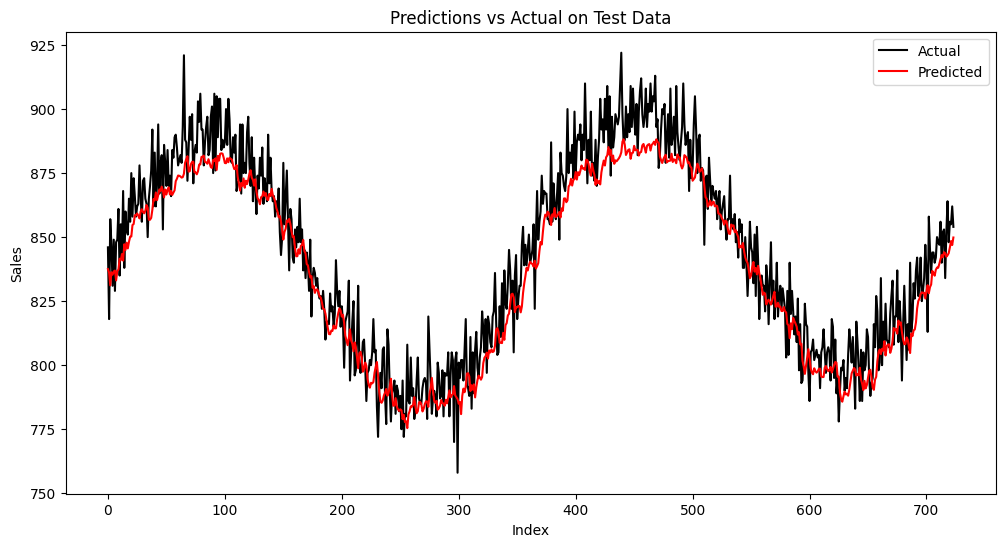

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,653 (10.37 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
# Load the data
url = "https://raw.githubusercontent.com/deepshamenghani/time-series-regression-tidymodels/main/data/timeseries_data_single_storeproduct.csv"
df = pd.read_csv(url)
df = df[['sales']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Step 2: Split the Data into Training and Testing Sets
# Determine split indices
train_size = int(len(df_scaled) * 0.8)
train_data = df_scaled[:train_size]
test_data = df_scaled[train_size:]

# Further split the training data into training and validation sets
train_valid_size = int(len(train_data) * 0.8)
train_data_final = train_data[:train_valid_size]
valid_data = train_data[train_valid_size:]

print(f"Training data shape: {train_data_final.shape}")
print(f"Validation data shape: {valid_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Step 3: Prepare Data for RNN Input
def create_sequences(data, n_timesteps):
    X = []
    y = []
    for i in range(len(data) - n_timesteps):
        X.append(data[i:i + n_timesteps])
        y.append(data[i + n_timesteps])
    return np.array(X), np.array(y)

n_timesteps = 7
n_features = 1

# Create sequences for training, validation, and testing
X_train, y_train = create_sequences(train_data_final, n_timesteps)
X_valid, y_valid = create_sequences(valid_data, n_timesteps)
X_test, y_test = create_sequences(test_data, n_timesteps)

# Reshape inputs to 3D (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], n_timesteps, n_features))
X_valid = X_valid.reshape((X_valid.shape[0], n_timesteps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_timesteps, n_features))

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Step 4: Build the RNN Model
model = keras.Sequential([
    layers.SimpleRNN(units=50, input_shape=(n_timesteps, n_features)),
    layers.Dense(units=1)
])

model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mean_absolute_error']
)

model.summary()

# Step 5: Train the Model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    verbose=1
)

# Step 6: Evaluate the Model
results = model.evaluate(X_train, y_train)
print(f"Training Loss: {results[0]}, Training MAE: {results[1]}")

# Step 7: Denormalize and Visualize Predictions
# Make predictions on test data
predictions_test = model.predict(X_test)

# Denormalize predictions and actual values
predictions_test_denorm = scaler.inverse_transform(predictions_test)
y_test_denorm = scaler.inverse_transform(y_test)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test_denorm, label='Actual', color='black')
plt.plot(predictions_test_denorm, label='Predicted', color='red')
plt.title('Predictions vs Actual on Test Data')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 8: Save and Load the Model
# Save the model
model.save('sales_rnn_model.h5')

# Load the model
reconstructed_model = keras.models.load_model('sales_rnn_model.h5')

# Verify the model structure
reconstructed_model.summary()


In [ ]:
df['rolling_mean_10']

,rolling_mean_10
Date,
2019-11-11 00:00:00+00:00,NaN
2019-11-12 00:00:00+00:00,NaN
2019-11-13 00:00:00+00:00,NaN
2019-11-14 00:00:00+00:00,NaN
2019-11-15 00:00:00+00:00,NaN
...,...
2024-11-04 00:00:00+00:00,248.253999
2024-11-05 00:00:00+00:00,251.600999
2024-11-06 00:00:00+00:00,259.089000


[*********************100%***********************]  1 of 1 completed


Price                          Close      lag_5 rolling_mean_10 rolling_sd_10
Ticker                          TSLA                                         
Date                                                                         
2019-11-22 00:00:00+00:00  22.202667  23.478001       23.281667      0.468725
2019-11-25 00:00:00+00:00  22.422667  23.332666       23.223333      0.538020
2019-11-26 00:00:00+00:00  21.927999  23.968000       23.083267      0.672954
2019-11-27 00:00:00+00:00  22.086000  23.481333       22.984467      0.743314
2019-11-29 00:00:00+00:00  21.996000  23.655333       22.855067      0.795048
Training data shape: (799, 4)
Validation data shape: (200, 4)
Testing data shape: (250, 4)
X_train shape: (792, 7, 4)
y_train shape: (792,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,801 (10.94 KB)

 Trainable params: 2,801 (10.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1853 - mean_absolute_error: 0.3322 - val_loss: 0.0054 - val_mean_absolute_error: 0.0666
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0056 - mean_absolute_error: 0.0592 - val_loss: 0.0012 - val_mean_absolute_error: 0.0289
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0021 - mean_absolute_error: 0.0350 - val_loss: 0.0013 - val_mean_absolute_error: 0.0288
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0017 - mean_absolute_error: 0.0300 - val_loss: 0.0011 - val_mean_absolute_error: 0.0272
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0014 - mean_absolute_error: 0.0264 - val_loss: 0.0011 - val_mean_absolute_error: 0.0270
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0014 - mean_absolute_error: 0.0277 - val_loss: 0.0013 - val_mean_absolute_error: 0.0281
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0015 - mean_absolute_error: 0.0282 - v

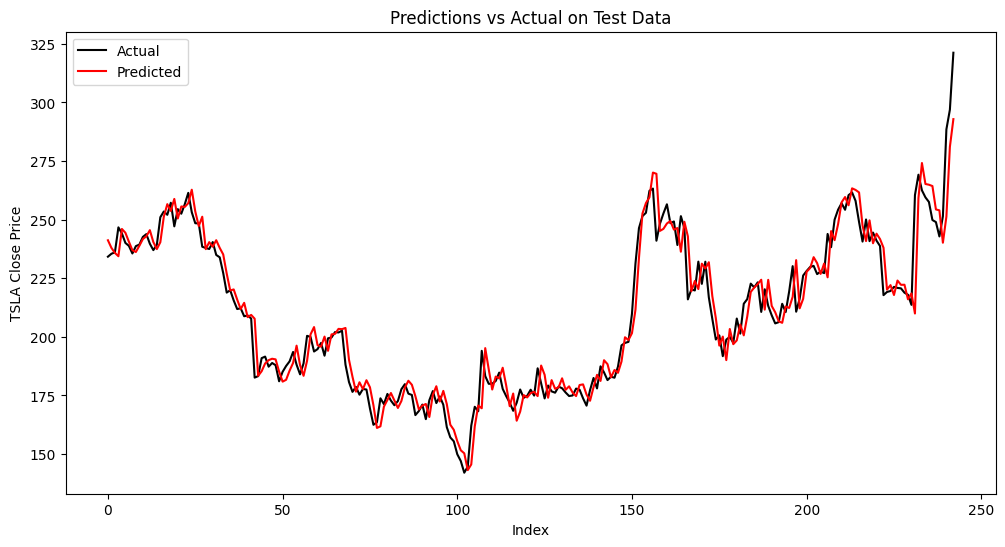

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,803 (10.95 KB)

 Trainable params: 2,801 (10.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
# Load TSLA stock data
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=5)  # Last 5 years
df = yf.download('TSLA', start=start_date, end=end_date)
df = df[['Close']]

# Step 2: Create Lag and Rolling Features
df['lag_5'] = df['Close'].shift(5)
df['rolling_mean_10'] = df['Close'].rolling(window=10).mean()
df['rolling_sd_10'] = df['Close'].rolling(window=10).std()
# df['rolling_diff_10'] = df['Close'] - df['rolling_mean_10']
df.dropna(inplace=True)

# Display first few rows
print(df.head())

# Step 3: Normalize the Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Step 4: Split Data into Training and Testing Sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Further split the training data into training and validation sets
train_valid_size = int(len(train_data) * 0.8)
train_data_final = train_data[:train_valid_size]
valid_data = train_data[train_valid_size:]

print(f"Training data shape: {train_data_final.shape}")
print(f"Validation data shape: {valid_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Step 5: Prepare Data for RNN Input
def create_sequences_multivariate(data, n_timesteps, target_column_index):
    X = []
    y = []
    for i in range(len(data) - n_timesteps):
        X.append(data[i:i + n_timesteps])
        y.append(data[i + n_timesteps, target_column_index])
    return np.array(X), np.array(y)

n_timesteps = 7
n_features = data_scaled.shape[1]
target_column_index = 0  # 'Close' is the target column

# Create sequences for training, validation, and testing
X_train, y_train = create_sequences_multivariate(train_data_final, n_timesteps, target_column_index)
X_valid, y_valid = create_sequences_multivariate(valid_data, n_timesteps, target_column_index)
X_test, y_test = create_sequences_multivariate(test_data, n_timesteps, target_column_index)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Step 6: Build the RNN Model
model = keras.Sequential([
    layers.SimpleRNN(units=50, input_shape=(n_timesteps, n_features)),
    layers.Dense(units=1)
])

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mean_absolute_error']
)

model.summary()

# Step 7: Train the Model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_valid, y_valid),
    verbose=1
)

# Step 8: Evaluate the Model
results = model.evaluate(X_train, y_train)
print(f"Training Loss: {results[0]}, Training MAE: {results[1]}")

# Step 9: Denormalize and Visualize Predictions
# Make predictions on test data
predictions_test = model.predict(X_test)

# Denormalize predictions and actual values
def denormalize(scaled_data, scaler, index):
    data = np.zeros((len(scaled_data), scaler.n_features_in_))
    data[:, index] = scaled_data[:, 0]
    data = scaler.inverse_transform(data)
    return data[:, index]

predictions_test_denorm = denormalize(predictions_test, scaler, target_column_index)
y_test_denorm = denormalize(y_test.reshape(-1, 1), scaler, target_column_index)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_test_denorm, label='Actual', color='black')
plt.plot(predictions_test_denorm, label='Predicted', color='red')
plt.title('Predictions vs Actual on Test Data')
plt.xlabel('Index')
plt.ylabel('TSLA Close Price')
plt.legend()
plt.show()

# Step 10: Save and Load the Model
# Save the model
model.save('tsla_rnn_model.h5')

# Load the model
reconstructed_model = keras.models.load_model('tsla_rnn_model.h5')

# Verify the model structure
reconstructed_model.summary()


In [ ]:
n_features

4

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 20/200, Train Loss: 0.002588, Valid Loss: 0.001199
Epoch 40/200, Train Loss: 0.001864, Valid Loss: 0.000834
Epoch 60/200, Train Loss: 0.001429, Valid Loss: 0.000624
Epoch 80/200, Train Loss: 0.001158, Valid Loss: 0.000585
Epoch 100/200, Train Loss: 0.001740, Valid Loss: 0.000810
Epoch 120/200, Train Loss: 0.000858, Valid Loss: 0.000508
Epoch 140/200, Train Loss: 0.000737, Valid Loss: 0.000444
Epoch 160/200, Train Loss: 0.000663, Valid Loss: 0.000432
Epoch 180/200, Train Loss: 0.001170, Valid Loss: 0.000612
Epoch 200/200, Train Loss: 0.000720, Valid Loss: 0.000455


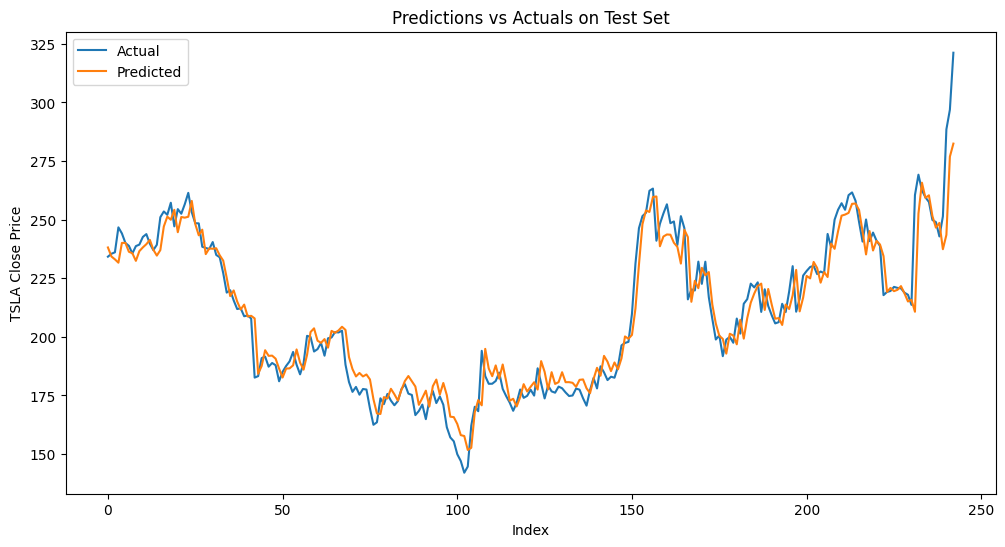

<ipython-input-13-e50e445c7255>:174: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('tsla_rnn_model.pth'))


RNNModel(
  (rnn): RNN(4, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
# Load dataset
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=5)  # Last 5 years
df = yf.download('TSLA', start=start_date, end=end_date)
df = df[['Close']]
df = df.sort_index()

# Step 2: Create Lag and Rolling Features
df['lag_5'] = df['Close'].shift(5)
df['rolling_mean_10'] = df['Close'].rolling(window=10).mean()
df['rolling_sd_10'] = df['Close'].rolling(window=10).std()
# df['rolling_diff_10'] = df['Close'] - df['rolling_mean_10']
df.dropna(inplace=True)

# Step 3: Normalize the Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Step 4: Split Data into Training and Testing Sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Further split the training data into training and validation sets
train_valid_size = int(len(train_data) * 0.8)
train_data_final = train_data[:train_valid_size]
valid_data = train_data[train_valid_size:]

# Step 5: Prepare Data for RNN Input
def create_sequences_multivariate(data, n_timesteps, target_column_index):
    X = []
    y = []
    for i in range(len(data) - n_timesteps):
        seq_x = data[i:i + n_timesteps]
        seq_y = data[i + n_timesteps, target_column_index]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_timesteps = 7
n_features = data_scaled.shape[1]
target_column_index = 0  # 'Close' is the target column

# Create sequences for training, validation, and testing
X_train, y_train = create_sequences_multivariate(train_data_final, n_timesteps, target_column_index)
X_valid, y_valid = create_sequences_multivariate(valid_data, n_timesteps, target_column_index)
X_test, y_test = create_sequences_multivariate(test_data, n_timesteps, target_column_index)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 6: Build the RNN Model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, output_size=1):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, h_n = self.rnn(x)
        out = out[:, -1, :]  # Take the output at the last time step
        out = self.fc(out)
        return out

model = RNNModel(input_size=n_features, hidden_size=50, output_size=1)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Step 7: Train the Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 200
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Evaluate on validation set
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for inputs, targets in valid_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            valid_loss += loss.item() * inputs.size(0)
    valid_loss /= len(valid_loader.dataset)
    valid_losses.append(valid_loss)

    if (epoch + 1) % 20 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.6f}, Valid Loss: {valid_loss:.6f}')

# Step 8: Evaluate the Model
# Evaluate on testing set
model.eval()
with torch.no_grad():
    test_preds = model(X_test.to(device)).cpu().numpy()
    test_actuals = y_test.numpy()

# Step 9: Denormalize and Visualize Predictions
# Since we have multiple features, we need to only inverse transform the target variable
def denormalize(scaled_data, scaler, index):
    data = np.zeros((len(scaled_data), scaler.n_features_in_))
    data[:, index] = scaled_data[:, 0]
    data = scaler.inverse_transform(data)
    return data[:, index]

# Denormalize the predictions and actuals
test_preds_denorm = denormalize(test_preds, scaler, target_column_index)
test_actuals_denorm = denormalize(test_actuals.reshape(-1, 1), scaler, target_column_index)

# Plot predictions vs actuals for the test set
plt.figure(figsize=(12, 6))
plt.plot(test_actuals_denorm, label='Actual')
plt.plot(test_preds_denorm, label='Predicted')
plt.title('Predictions vs Actuals on Test Set')
plt.xlabel('Index')
plt.ylabel('TSLA Close Price')
plt.legend()
plt.show()

# Step 10: Save and Load the Model
# Save the model
torch.save(model.state_dict(), 'tsla_rnn_model.pth')

# Load the model
loaded_model = RNNModel(input_size=n_features, hidden_size=50, output_size=1)
loaded_model.load_state_dict(torch.load('tsla_rnn_model.pth'))
loaded_model.to(device)
loaded_model.eval()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([29, 1])) that is different to the input size (torch.Size([29])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([6, 1])) that is different to the input size (torch.Size([6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, t

Epoch 10/200, Train Loss: 0.013555, Valid Loss: 0.011732
Epoch 20/200, Train Loss: 0.017126, Valid Loss: 0.011780
Epoch 30/200, Train Loss: 0.012860, Valid Loss: 0.011925
Epoch 40/200, Train Loss: 0.012785, Valid Loss: 0.011889
Epoch 50/200, Train Loss: 0.012762, Valid Loss: 0.011887
Epoch 60/200, Train Loss: 0.012755, Valid Loss: 0.011816
Epoch 70/200, Train Loss: 0.013135, Valid Loss: 0.011661
Epoch 80/200, Train Loss: 0.054496, Valid Loss: 0.028833
Epoch 90/200, Train Loss: 0.018026, Valid Loss: 0.012827
Epoch 100/200, Train Loss: 0.019474, Valid Loss: 0.013715
Epoch 110/200, Train Loss: 0.021488, Valid Loss: 0.015530
Epoch 120/200, Train Loss: 0.023060, Valid Loss: 0.015037
Epoch 130/200, Train Loss: 0.065529, Valid Loss: 0.023299
Epoch 140/200, Train Loss: 0.022713, Valid Loss: 0.016481
Epoch 150/200, Train Loss: 0.016067, Valid Loss: 0.012392
Epoch 160/200, Train Loss: 0.070880, Valid Loss: 0.047819
Epoch 170/200, Train Loss: 0.015983, Valid Loss: 0.013354
Epoch 180/200, Train Lo

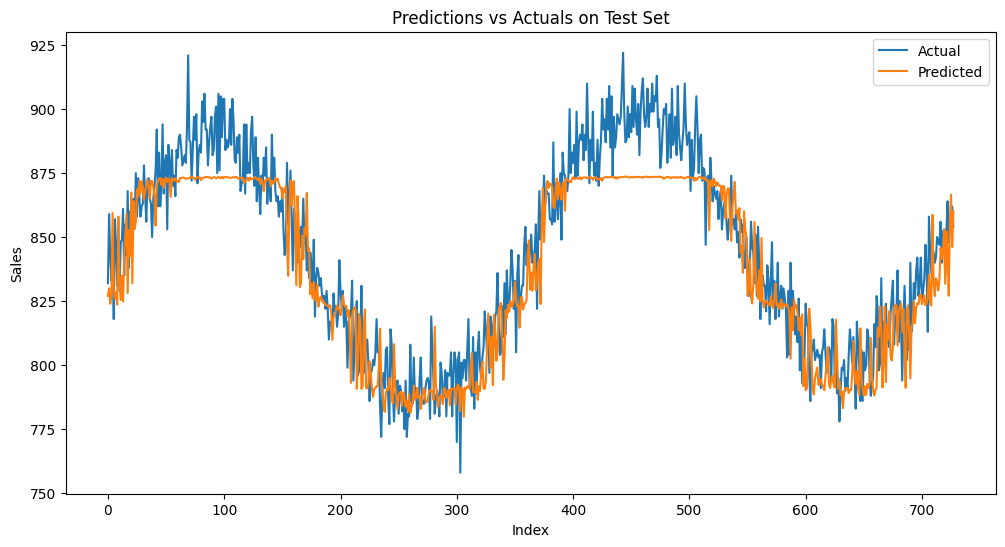

<ipython-input-20-f51a189fb66d>:165: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('sales_rnn_model.pth'))


RNNModel(
  (rnn): RNN(1, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
# Load the data
url = "https://raw.githubusercontent.com/deepshamenghani/time-series-regression-tidymodels/refs/heads/main/data/timeseries_data_single_storeproduct.csv"
df = pd.read_csv(url)
df = df[['sales']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Step 2: Split Data into Training and Testing Sets
# Split data sequentially for time-series analysis
train_size = int(len(df_scaled) * 0.8)
train_data = df_scaled[:train_size]
test_data = df_scaled[train_size:]

# Further split the training data into training and validation sets
train_valid_size = int(len(train_data) * 0.8)
train_data_final = train_data[:train_valid_size]
valid_data = train_data[train_valid_size:]

# Step 3: Prepare Data for RNN Input
def create_sequences(data, n_timesteps):
    X = []
    y = []
    for i in range(len(data) - n_timesteps):
        seq = data[i:i + n_timesteps]
        label = data[i + n_timesteps]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

n_timesteps = 3
n_features = 1

# Create sequences for training, validation, and testing
X_train, y_train = create_sequences(train_data_final, n_timesteps)
X_valid, y_valid = create_sequences(valid_data, n_timesteps)
X_test, y_test = create_sequences(test_data, n_timesteps)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32).reshape(-1, n_timesteps, n_features)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_valid = torch.tensor(X_valid, dtype=torch.float32).reshape(-1, n_timesteps, n_features)
y_valid = torch.tensor(y_valid, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32).reshape(-1, n_timesteps, n_features)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 4: Build the RNN Model
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, h_n = self.rnn(x)
        out = out[:, -1, :]  # Take the output at the last time step
        out = self.fc(out)
        return out

model = RNNModel(input_size=n_features, hidden_size=50, output_size=1)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 5: Train the Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 200
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Evaluate on validation set
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for inputs, targets in valid_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            valid_loss += loss.item() * inputs.size(0)
    valid_loss /= len(valid_loader.dataset)
    valid_losses.append(valid_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.6f}, Valid Loss: {valid_loss:.6f}')

# Step 6: Evaluate the Model
# Evaluate on training set
model.eval()
with torch.no_grad():
    train_preds = model(X_train.to(device)).cpu().numpy()
    train_actuals = y_train.numpy()

# Evaluate on testing set
with torch.no_grad():
    test_preds = model(X_test.to(device)).cpu().numpy()
    test_actuals = y_test.numpy()

# Step 7: Denormalize and Visualize Predictions
# Denormalize the predictions and actuals
train_preds_denorm = scaler.inverse_transform(train_preds)
train_actuals_denorm = scaler.inverse_transform(train_actuals.reshape(-1, 1))

test_preds_denorm = scaler.inverse_transform(test_preds)
test_actuals_denorm = scaler.inverse_transform(test_actuals.reshape(-1, 1))

# Plot predictions vs actuals for the test set
plt.figure(figsize=(12, 6))
plt.plot(test_actuals_denorm, label='Actual')
plt.plot(test_preds_denorm, label='Predicted')
plt.title('Predictions vs Actuals on Test Set')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 8: Save and Load the Model
# Save the model
torch.save(model.state_dict(), 'sales_rnn_model.pth')

# Load the model
loaded_model = RNNModel(input_size=n_features, hidden_size=50, output_size=1)
loaded_model.load_state_dict(torch.load('sales_rnn_model.pth'))
loaded_model.to(device)
loaded_model.eval()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([25, 1])) that is different to the input size (torch.Size([25])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, t

Epoch 10/400, Train Loss: 0.013223, Valid Loss: 0.011773
Epoch 20/400, Train Loss: 0.012857, Valid Loss: 0.011996
Epoch 30/400, Train Loss: 0.120323, Valid Loss: 0.063398
Epoch 40/400, Train Loss: 0.041286, Valid Loss: 0.040243
Epoch 50/400, Train Loss: 0.026795, Valid Loss: 0.014988
Epoch 60/400, Train Loss: 0.020529, Valid Loss: 0.012939
Epoch 70/400, Train Loss: 0.022786, Valid Loss: 0.015961
Epoch 80/400, Train Loss: 0.021870, Valid Loss: 0.014781
Epoch 90/400, Train Loss: 0.019472, Valid Loss: 0.014915
Epoch 100/400, Train Loss: 0.026515, Valid Loss: 0.020877
Epoch 110/400, Train Loss: 0.040475, Valid Loss: 0.019130
Epoch 120/400, Train Loss: 0.020374, Valid Loss: 0.015280
Epoch 130/400, Train Loss: 0.021450, Valid Loss: 0.018401
Epoch 140/400, Train Loss: 0.020785, Valid Loss: 0.017512
Epoch 150/400, Train Loss: 0.141106, Valid Loss: 0.080571
Epoch 160/400, Train Loss: 0.016325, Valid Loss: 0.013965
Epoch 170/400, Train Loss: 0.016458, Valid Loss: 0.013545
Epoch 180/400, Train Lo

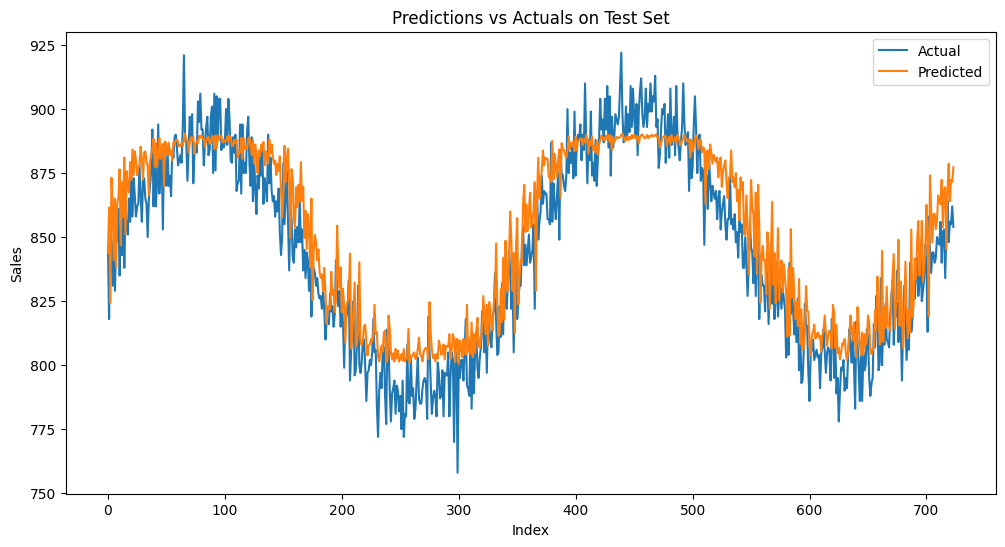

<ipython-input-2-f85643748763>:165: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('sales_rnn_model.pth'))


RNNModel(
  (rnn): RNN(1, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
# Load the data
url = "https://raw.githubusercontent.com/deepshamenghani/time-series-regression-tidymodels/refs/heads/main/data/timeseries_data_single_storeproduct.csv"
df = pd.read_csv(url)
df = df[['sales']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Step 2: Split Data into Training and Testing Sets
# Split data sequentially for time-series analysis
train_size = int(len(df_scaled) * 0.8)
train_data = df_scaled[:train_size]
test_data = df_scaled[train_size:]

# Further split the training data into training and validation sets
train_valid_size = int(len(train_data) * 0.8)
train_data_final = train_data[:train_valid_size]
valid_data = train_data[train_valid_size:]

# Step 3: Prepare Data for RNN Input
def create_sequences(data, n_timesteps):
    X = []
    y = []
    for i in range(len(data) - n_timesteps):
        seq = data[i:i + n_timesteps]
        label = data[i + n_timesteps]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

n_timesteps = 7
n_features = 1

# Create sequences for training, validation, and testing
X_train, y_train = create_sequences(train_data_final, n_timesteps)
X_valid, y_valid = create_sequences(valid_data, n_timesteps)
X_test, y_test = create_sequences(test_data, n_timesteps)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32).reshape(-1, n_timesteps, n_features)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_valid = torch.tensor(X_valid, dtype=torch.float32).reshape(-1, n_timesteps, n_features)
y_valid = torch.tensor(y_valid, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32).reshape(-1, n_timesteps, n_features)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 4: Build the RNN Model
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, h_n = self.rnn(x)
        out = out[:, -1, :]  # Take the output at the last time step
        out = self.fc(out)
        return out

model = RNNModel(input_size=n_features, hidden_size=50, output_size=1)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 5: Train the Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 400
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Evaluate on validation set
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for inputs, targets in valid_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            valid_loss += loss.item() * inputs.size(0)
    valid_loss /= len(valid_loader.dataset)
    valid_losses.append(valid_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.6f}, Valid Loss: {valid_loss:.6f}')

# Step 6: Evaluate the Model
# Evaluate on training set
model.eval()
with torch.no_grad():
    train_preds = model(X_train.to(device)).cpu().numpy()
    train_actuals = y_train.numpy()

# Evaluate on testing set
with torch.no_grad():
    test_preds = model(X_test.to(device)).cpu().numpy()
    test_actuals = y_test.numpy()

# Step 7: Denormalize and Visualize Predictions
# Denormalize the predictions and actuals
train_preds_denorm = scaler.inverse_transform(train_preds)
train_actuals_denorm = scaler.inverse_transform(train_actuals.reshape(-1, 1))

test_preds_denorm = scaler.inverse_transform(test_preds)
test_actuals_denorm = scaler.inverse_transform(test_actuals.reshape(-1, 1))

# Plot predictions vs actuals for the test set
plt.figure(figsize=(12, 6))
plt.plot(test_actuals_denorm, label='Actual')
plt.plot(test_preds_denorm, label='Predicted')
plt.title('Predictions vs Actuals on Test Set')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 8: Save and Load the Model
# Save the model
torch.save(model.state_dict(), 'sales_rnn_model.pth')

# Load the model
loaded_model = RNNModel(input_size=n_features, hidden_size=50, output_size=1)
loaded_model.load_state_dict(torch.load('sales_rnn_model.pth'))
loaded_model.to(device)
loaded_model.eval()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([25, 1])) that is different to the input size (torch.Size([25])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, t

Epoch 10/200, Train Loss: 0.013073, Valid Loss: 0.011470
Epoch 20/200, Train Loss: 0.012712, Valid Loss: 0.011526
Epoch 30/200, Train Loss: 0.012588, Valid Loss: 0.011659
Epoch 40/200, Train Loss: 0.012628, Valid Loss: 0.011763
Epoch 50/200, Train Loss: 0.012479, Valid Loss: 0.011721
Epoch 60/200, Train Loss: 0.012619, Valid Loss: 0.011643
Epoch 70/200, Train Loss: 0.012500, Valid Loss: 0.011654
Epoch 80/200, Train Loss: 0.012478, Valid Loss: 0.011647
Epoch 90/200, Train Loss: 0.012563, Valid Loss: 0.011662
Epoch 100/200, Train Loss: 0.012433, Valid Loss: 0.011686
Epoch 110/200, Train Loss: 0.012443, Valid Loss: 0.011664
Epoch 120/200, Train Loss: 0.012421, Valid Loss: 0.011754
Epoch 130/200, Train Loss: 0.012426, Valid Loss: 0.011713
Epoch 140/200, Train Loss: 0.012410, Valid Loss: 0.011707
Epoch 150/200, Train Loss: 0.012330, Valid Loss: 0.011721
Epoch 160/200, Train Loss: 0.012360, Valid Loss: 0.011701
Epoch 170/200, Train Loss: 0.012307, Valid Loss: 0.011723
Epoch 180/200, Train Lo

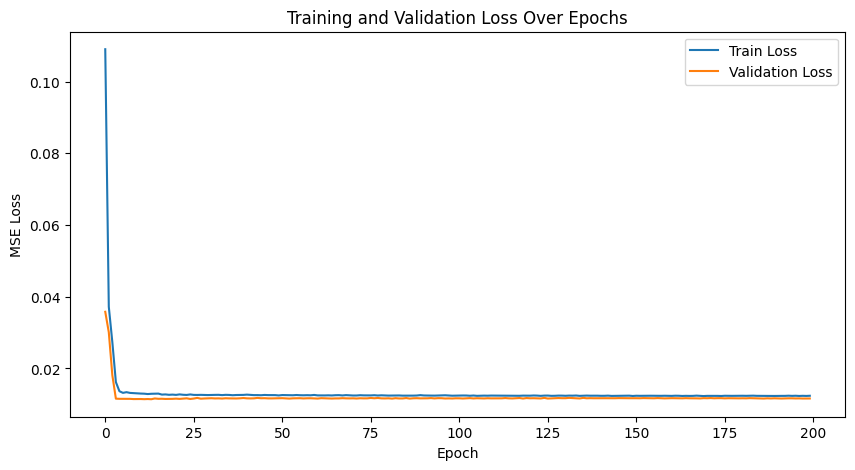

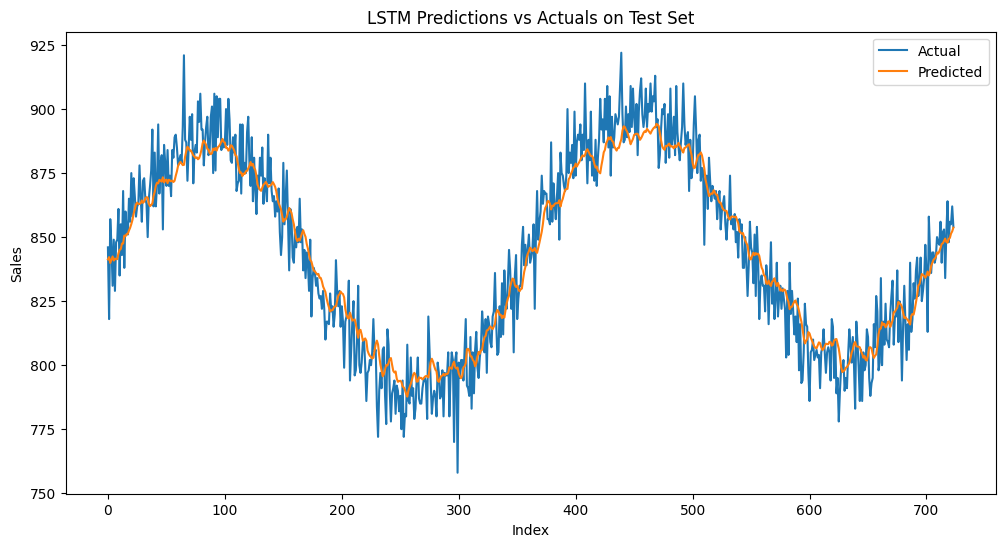

<ipython-input-24-f6a2f61f1b45>:185: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('sales_lstm_model.pth'))


LSTMModel(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
# Load the data
url = "https://raw.githubusercontent.com/deepshamenghani/time-series-regression-tidymodels/refs/heads/main/data/timeseries_data_single_storeproduct.csv"
df = pd.read_csv(url)
df = df[['sales']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Step 2: Split Data into Training and Testing Sets
# Split data sequentially for time-series analysis
train_size = int(len(df_scaled) * 0.8)
train_data = df_scaled[:train_size]
test_data = df_scaled[train_size:]

# Further split the training data into training and validation sets
train_valid_size = int(len(train_data) * 0.8)
train_data_final = train_data[:train_valid_size]
valid_data = train_data[train_valid_size:]

# Step 3: Prepare Data for LSTM Input
def create_sequences(data, n_timesteps):
    X = []
    y = []
    for i in range(len(data) - n_timesteps):
        seq = data[i:i + n_timesteps]
        label = data[i + n_timesteps]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

n_timesteps = 7
n_features = 1

# Create sequences for training, validation, and testing
X_train, y_train = create_sequences(train_data_final, n_timesteps)
X_valid, y_valid = create_sequences(valid_data, n_timesteps)
X_test, y_test = create_sequences(test_data, n_timesteps)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32).reshape(-1, n_timesteps, n_features)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_valid = torch.tensor(X_valid, dtype=torch.float32).reshape(-1, n_timesteps, n_features)
y_valid = torch.tensor(y_valid, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32).reshape(-1, n_timesteps, n_features)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Step 4: Build the LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Initialize LSTM instead of RNN
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state and cell state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        out = out[:, -1, :]  # Take the output at the last time step
        out = self.fc(out)
        return out

# Instantiate the model
model = LSTMModel(input_size=n_features, hidden_size=50, num_layers=2, output_size=1, dropout=0.2)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Reduced learning rate for LSTM

# Step 5: Train the Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 200
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Evaluate on validation set
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for inputs, targets in valid_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            valid_loss += loss.item() * inputs.size(0)
    valid_loss /= len(valid_loader.dataset)
    valid_losses.append(valid_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.6f}, Valid Loss: {valid_loss:.6f}')

# Step 6: Evaluate the Model
# Evaluate on training set
model.eval()
with torch.no_grad():
    train_preds = model(X_train.to(device)).cpu().numpy()
    train_actuals = y_train.numpy()

# Evaluate on testing set
with torch.no_grad():
    test_preds = model(X_test.to(device)).cpu().numpy()
    test_actuals = y_test.numpy()

# Step 7: Denormalize and Visualize Predictions
# Denormalize the predictions and actuals
train_preds_denorm = scaler.inverse_transform(train_preds)
train_actuals_denorm = scaler.inverse_transform(train_actuals.reshape(-1, 1))

test_preds_denorm = scaler.inverse_transform(test_preds)
test_actuals_denorm = scaler.inverse_transform(test_actuals.reshape(-1, 1))

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# Plot predictions vs actuals for the test set
plt.figure(figsize=(12, 6))
plt.plot(test_actuals_denorm, label='Actual')
plt.plot(test_preds_denorm, label='Predicted')
plt.title('LSTM Predictions vs Actuals on Test Set')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 8: Save and Load the Model
# Save the model
torch.save(model.state_dict(), 'sales_lstm_model.pth')

# Load the model
loaded_model = LSTMModel(input_size=n_features, hidden_size=50, num_layers=2, output_size=1, dropout=0.2)
loaded_model.load_state_dict(torch.load('sales_lstm_model.pth'))
loaded_model.to(device)
loaded_model.eval()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 20/200, Train Loss: 0.005810, Valid Loss: 0.002604
Epoch 40/200, Train Loss: 0.004162, Valid Loss: 0.002174
Epoch 60/200, Train Loss: 0.003880, Valid Loss: 0.001913
Epoch 80/200, Train Loss: 0.003541, Valid Loss: 0.001924
Epoch 100/200, Train Loss: 0.002635, Valid Loss: 0.001386
Epoch 120/200, Train Loss: 0.002558, Valid Loss: 0.001135
Epoch 140/200, Train Loss: 0.001850, Valid Loss: 0.001035
Epoch 160/200, Train Loss: 0.001957, Valid Loss: 0.000881
Epoch 180/200, Train Loss: 0.001678, Valid Loss: 0.000614
Epoch 200/200, Train Loss: 0.001422, Valid Loss: 0.000573


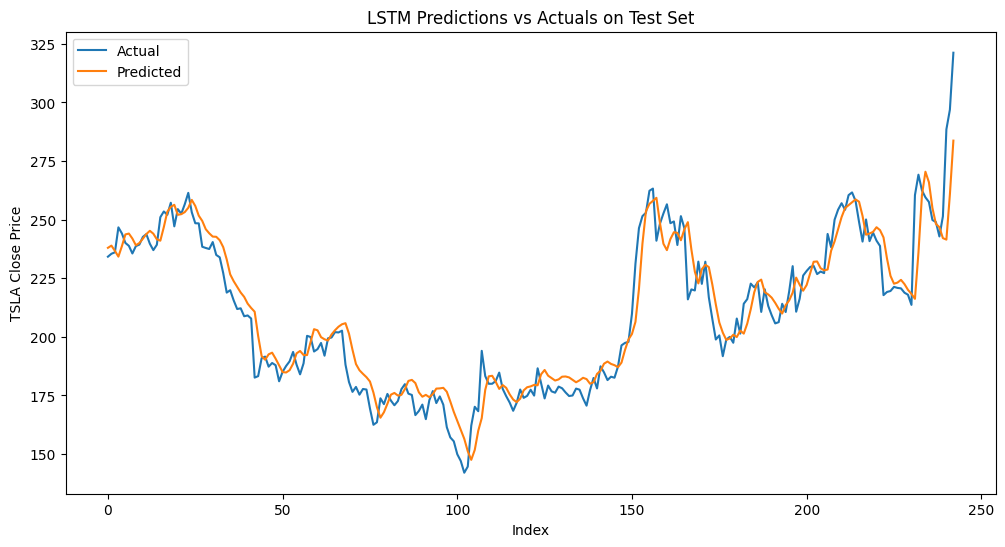

<ipython-input-23-bbb8dde5837b>:183: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('tsla_lstm_model.pth'))


LSTMModel(
  (lstm): LSTM(4, 50, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
# Load dataset
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=5)  # Last 5 years
df = yf.download('TSLA', start=start_date, end=end_date)
df = df[['Close']]
df = df.sort_index()

# Step 2: Create Lag and Rolling Features
df['lag_5'] = df['Close'].shift(5)
df['rolling_mean_10'] = df['Close'].rolling(window=10).mean()
df['rolling_sd_10'] = df['Close'].rolling(window=10).std()
# df['rolling_diff_10'] = df['Close'] - df['rolling_mean_10']
df.dropna(inplace=True)

# Step 3: Normalize the Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Step 4: Split Data into Training and Testing Sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Further split the training data into training and validation sets
train_valid_size = int(len(train_data) * 0.8)
train_data_final = train_data[:train_valid_size]
valid_data = train_data[train_valid_size:]

# Step 5: Prepare Data for LSTM Input
def create_sequences_multivariate(data, n_timesteps, target_column_index):
    X = []
    y = []
    for i in range(len(data) - n_timesteps):
        seq_x = data[i:i + n_timesteps]
        seq_y = data[i + n_timesteps, target_column_index]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_timesteps = 7
n_features = data_scaled.shape[1]
target_column_index = 0  # 'Close' is the target column

# Create sequences for training, validation, and testing
X_train, y_train = create_sequences_multivariate(train_data_final, n_timesteps, target_column_index)
X_valid, y_valid = create_sequences_multivariate(valid_data, n_timesteps, target_column_index)
X_test, y_test = create_sequences_multivariate(test_data, n_timesteps, target_column_index)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 6: Build the LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=2, output_size=1, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Initialize LSTM instead of RNN
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state and cell state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)

        # Decode the hidden state of the last time step
        out = out[:, -1, :]  # Take the output at the last time step
        out = self.fc(out)
        return out

model = LSTMModel(input_size=n_features, hidden_size=50, num_layers=2, output_size=1, dropout=0.2)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Reduced learning rate for LSTM

# Step 7: Train the Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

num_epochs = 200
train_losses = []
valid_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Evaluate on validation set
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for inputs, targets in valid_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            valid_loss += loss.item() * inputs.size(0)
    valid_loss /= len(valid_loader.dataset)
    valid_losses.append(valid_loss)

    if (epoch + 1) % 20 == 0:
        print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.6f}, Valid Loss: {valid_loss:.6f}')

# Step 8: Evaluate the Model
# Evaluate on testing set
model.eval()
with torch.no_grad():
    test_preds = model(X_test.to(device)).cpu().numpy()
    test_actuals = y_test.numpy()

# Step 9: Denormalize and Visualize Predictions
# Since we have multiple features, we need to only inverse transform the target variable
def denormalize(scaled_data, scaler, index):
    data = np.zeros((len(scaled_data), scaler.n_features_in_))
    data[:, index] = scaled_data[:, 0]
    data = scaler.inverse_transform(data)
    return data[:, index]

# Denormalize the predictions and actuals
test_preds_denorm = denormalize(test_preds, scaler, target_column_index)
test_actuals_denorm = denormalize(test_actuals.reshape(-1, 1), scaler, target_column_index)

# Plot predictions vs actuals for the test set
plt.figure(figsize=(12, 6))
plt.plot(test_actuals_denorm, label='Actual')
plt.plot(test_preds_denorm, label='Predicted')
plt.title('LSTM Predictions vs Actuals on Test Set')
plt.xlabel('Index')
plt.ylabel('TSLA Close Price')
plt.legend()
plt.show()

# Step 10: Save and Load the Model
# Save the model
torch.save(model.state_dict(), 'tsla_lstm_model.pth')

# Load the model
loaded_model = LSTMModel(input_size=n_features, hidden_size=50, num_layers=2, output_size=1, dropout=0.2)
loaded_model.load_state_dict(torch.load('tsla_lstm_model.pth'))
loaded_model.to(device)
loaded_model.eval()


[*********************100%***********************]  1 of 1 completed


First few rows of the dataset:
Price                      Adj Close      Close       High        Low  \
Ticker                          TSLA       TSLA       TSLA       TSLA   
Date                                                                    
2019-11-11 00:00:00+00:00  23.006001  23.006001  23.279333  22.799999   
2019-11-12 00:00:00+00:00  23.328667  23.328667  23.358000  22.936001   
2019-11-13 00:00:00+00:00  23.073999  23.073999  23.755333  23.011999   
2019-11-14 00:00:00+00:00  23.290001  23.290001  23.589333  22.860666   
2019-11-15 00:00:00+00:00  23.478001  23.478001  23.520000  23.224001   

Price                           Open     Volume  
Ticker                          TSLA       TSLA  
Date                                             
2019-11-11 00:00:00+00:00  22.930000  149800500  
2019-11-12 00:00:00+00:00  23.126667  110391000  
2019-11-13 00:00:00+00:00  23.666668  126301500  
2019-11-14 00:00:00+00:00  23.073999   96973500  
2019-11-15 00:00:00+00:00  23.3759

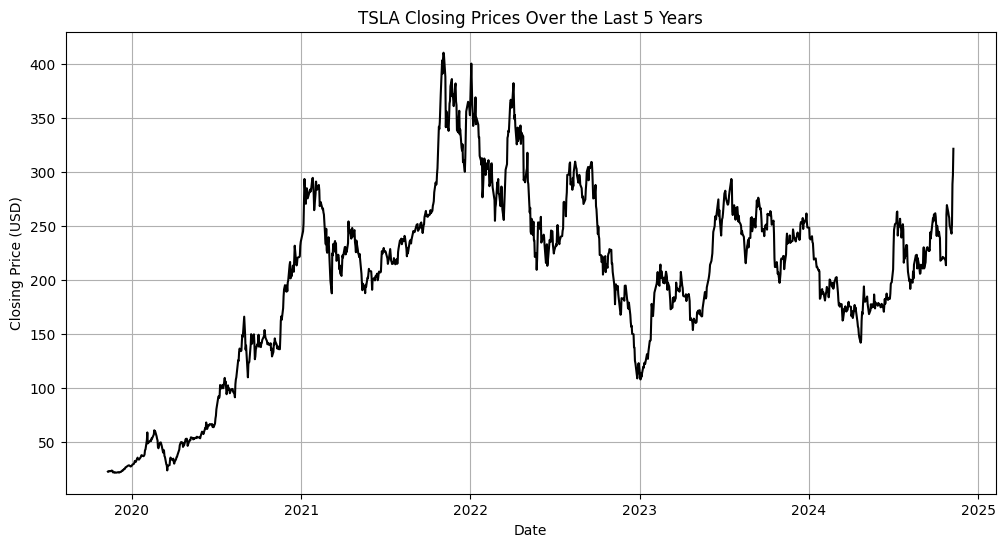


First few rows after preprocessing:
   year semester quarter day_in_week week_in_year day_in_year     month  \
0  2019        2       4      Monday           46         315  November   
1  2019        2       4     Tuesday           46         316  November   
2  2019        2       4   Wednesday           46         317  November   
3  2019        2       4    Thursday           46         318  November   
4  2019        2       4      Friday           46         319  November   

   closeTSLA      lag_1      lag_2  rolling_avg_4  rolling_diff_4  \
0  23.006001  23.006001  23.006001      23.174667       -0.168666   
1  23.328667  23.006001  23.006001      23.174667        0.154000   
2  23.073999  23.328667  23.006001      23.174667       -0.100667   
3  23.290001  23.073999  23.328667      23.174667        0.115334   
4  23.478001  23.290001  23.073999      23.292667        0.185334   

                       Date  
0 2019-11-11 00:00:00+00:00  
1 2019-11-12 00:00:00+00:00  
2 2019-

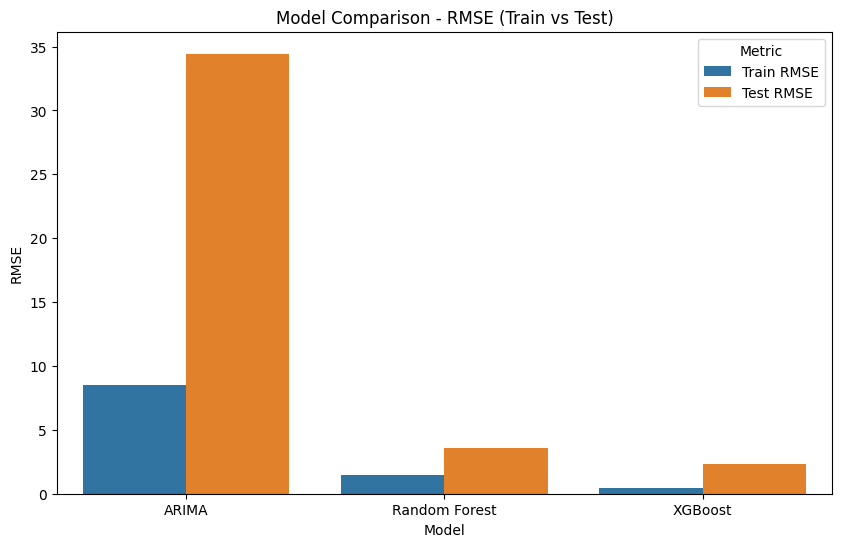

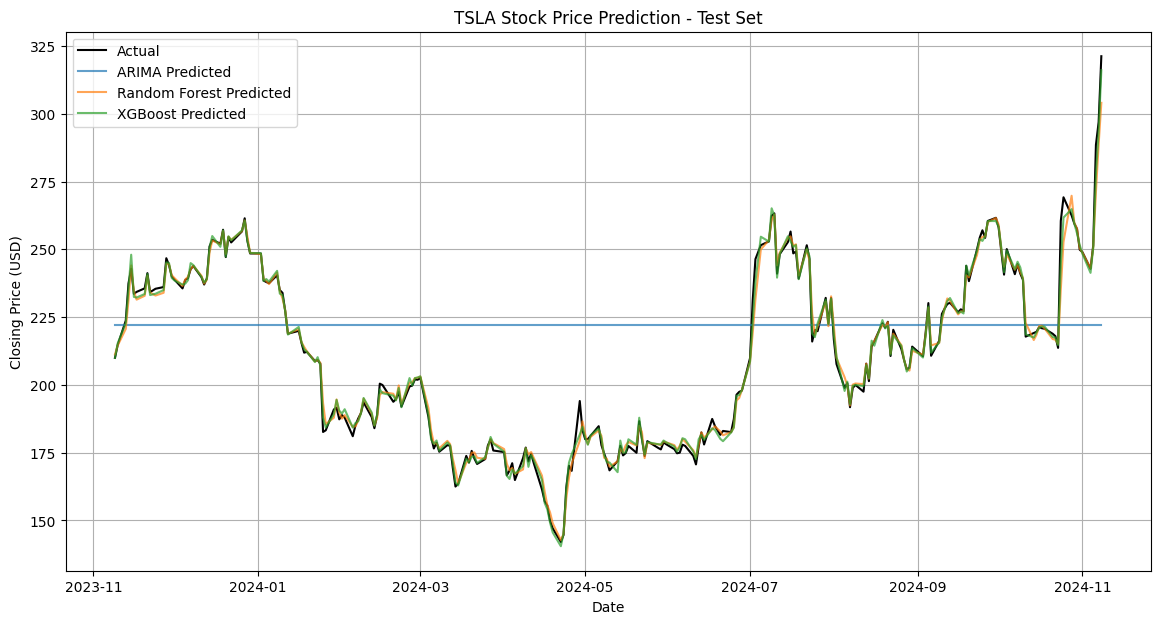

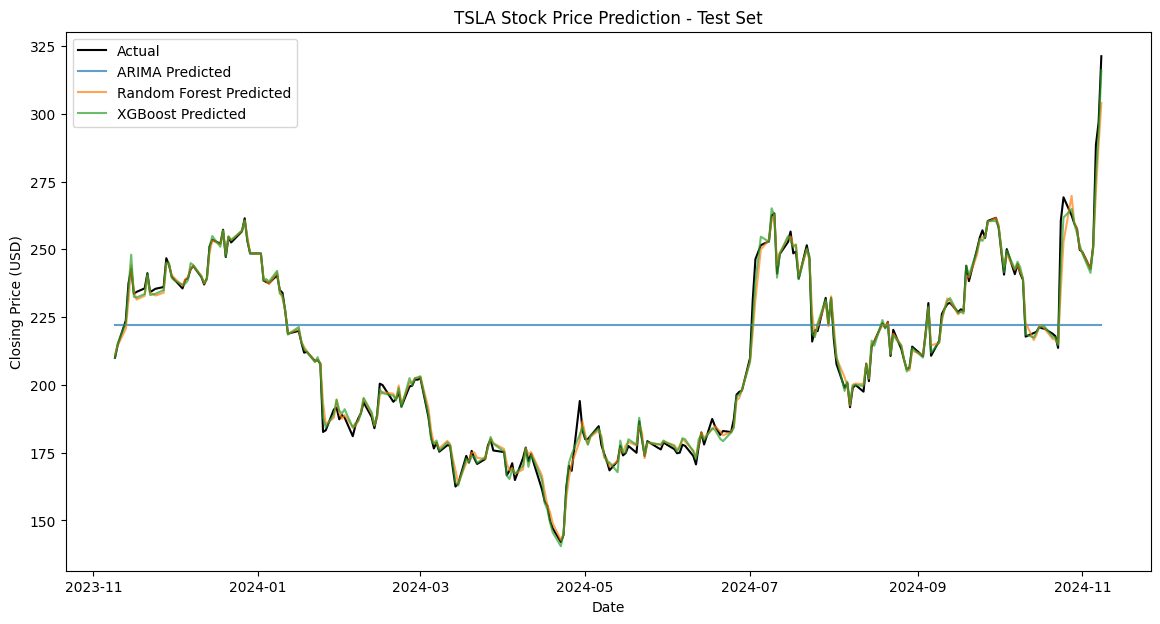

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Step 1: Load and Visualize Data
# --------------------------------

# Define the ticker symbol and download data
ticker = 'TSLA'
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=5)  # Last 5 years

# Download data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)

# Ensure data is sorted by date
df = df.sort_index()

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], color='black')
plt.title(f'{ticker} Closing Prices Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

# Step 2: Preprocess the Data
# ---------------------------

# Convert index to a column
df.reset_index(inplace=True)

# Rename columns for convenience
df.rename(columns={
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume',
    'Adj Close': 'adjusted'
}, inplace=True)
# Flatten the column names
df.columns = [''.join(col).strip() for col in df.columns.values]

# Remove unnecessary prefix if needed
df.columns = df.columns.str.replace('level_0_', '')
df.columns = df.columns.str.replace('index_', '')
# Feature Engineering: Create date-based features
df['year'] = df['Date'].dt.year
df['semester'] = df['Date'].dt.month.apply(lambda x: 1 if x <= 6 else 2)
df['semester'] = df['semester'].astype('category')

df['quarter'] = df['Date'].dt.quarter.astype('category')

df['day_in_week'] = df['Date'].dt.dayofweek + 1  # Monday=0 in Python, so add 1 to match R's wday
df['day_in_week'] = df['day_in_week'].astype('category')

# Get the current categories in 'day_in_week'
current_categories = df['day_in_week'].cat.categories

# Define a mapping to rename categories, handling potential missing days
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
category_mapping = dict(zip(current_categories, day_names[:len(current_categories)]))

# Rename the categories using the mapping
df['day_in_week'] = df['day_in_week'].cat.rename_categories(category_mapping)

df['week_in_year'] = df['Date'].dt.isocalendar().week.astype('category')
df['day_in_year'] = df['Date'].dt.dayofyear.astype('category')
df['month'] = df['Date'].dt.month_name().astype('category')

# Create lag features and rolling averages
n_lags = 2
n_rolling = 4

for lag in range(1, n_lags + 1):
    df[f'lag_{lag}'] = df['closeTSLA'].shift(lag)

# Rolling 4-day average and difference from rolling average
df['rolling_avg_4'] = df['closeTSLA'].rolling(window=4).mean()
df['rolling_sd_4'] = df['closeTSLA'].rolling(window=4).std()
df['rolling_avg_4'] = df['rolling_avg_4'].fillna(method='bfill')
df['rolling_sd_4'] = df['rolling_sd_4'].fillna(method='bfill')
df['rolling_diff_4'] = df['closeTSLA'] - df['rolling_avg_4']
df['rolling_diff_4'] = df['closeTSLA'] - df['rolling_avg_4']

# Select relevant columns
df_stock = df[['year', 'semester', 'quarter', 'day_in_week', 'week_in_year',
              'day_in_year', 'month', 'closeTSLA', 'lag_1', 'lag_2', 'rolling_avg_4', 'rolling_diff_4', 'Date']]

# Fill missing values
df_stock.fillna(method='bfill', inplace=True)
df_stock.fillna(method='ffill', inplace=True)

# Drop any remaining missing values
df_stock.dropna(inplace=True)

# Display the first few rows of the processed dataset
print("\nFirst few rows after preprocessing:")
print(df_stock.head())

# Step 3: Split the Data into Training and Testing Sets
# ------------------------------------------------------

# Define the proportion of data to be used for training
train_size = int(len(df_stock) * 0.8)

# Split the data
train_data = df_stock.iloc[:train_size]
test_data = df_stock.iloc[train_size:]

print(f"\nTraining data points: {len(train_data)}")
print(f"Testing data points: {len(test_data)}")

# Step 4: Fit Multiple Models
# ---------------------------

# Initialize dictionaries to store models and their predictions
models = {}
predictions = {}
metrics = {}

# 4.1 ARIMA Model
# --------------

print("\nFitting ARIMA model...")
# ARIMA is inherently univariate; we'll use the 'close' price

# Fit ARIMA model using pmdarima's auto_arima for parameter selection
arima_model = pm.auto_arima(train_data['closeTSLA'], seasonal=False, stepwise=True, suppress_warnings=True)
models['ARIMA'] = arima_model

# Predict on training and testing data
train_pred_arima = arima_model.predict_in_sample()
test_pred_arima = arima_model.predict(n_periods=len(test_data))

# Store predictions
predictions['ARIMA'] = {
    'train': train_pred_arima,
    'test': test_pred_arima
}

# Calculate metrics
metrics['ARIMA'] = {}
metrics['ARIMA']['Train RMSE'] = np.sqrt(mean_squared_error(train_data['closeTSLA'], train_pred_arima))
metrics['ARIMA']['Test RMSE'] = np.sqrt(mean_squared_error(test_data['closeTSLA'], test_pred_arima))

print("ARIMA model fitted.")

# 4.2 Random Forest Model
# -----------------------

print("\nFitting Random Forest model...")
# Prepare features and target
feature_cols = ['year', 'semester', 'quarter', 'day_in_week', 'week_in_year',
                'day_in_year', 'month', 'lag_1', 'lag_2', 'rolling_avg_4', 'rolling_diff_4']

X_train_rf = pd.get_dummies(train_data[feature_cols], drop_first=True)
y_train_rf = train_data['closeTSLA']

X_test_rf = pd.get_dummies(test_data[feature_cols], drop_first=True)
y_test_rf = test_data['closeTSLA']

# Ensure the same columns in train and test
X_train_rf, X_test_rf = X_train_rf.align(X_test_rf, join='left', axis=1, fill_value=0)

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)
models['Random Forest'] = rf_model

# Predict on training and testing data
train_pred_rf = rf_model.predict(X_train_rf)
test_pred_rf = rf_model.predict(X_test_rf)

# Store predictions
predictions['Random Forest'] = {
    'train': train_pred_rf,
    'test': test_pred_rf
}

# Calculate metrics
metrics['Random Forest'] = {}
metrics['Random Forest']['Train RMSE'] = np.sqrt(mean_squared_error(y_train_rf, train_pred_rf))
metrics['Random Forest']['Test RMSE'] = np.sqrt(mean_squared_error(y_test_rf, test_pred_rf))

print("Random Forest model fitted.")

# 4.3 XGBoost Model
# -----------------

print("\nFitting XGBoost model...")
# Initialize and fit the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train_rf, y_train_rf)
models['XGBoost'] = xgb_model

# Predict on training and testing data
train_pred_xgb = xgb_model.predict(X_train_rf)
test_pred_xgb = xgb_model.predict(X_test_rf)

# Store predictions
predictions['XGBoost'] = {
    'train': train_pred_xgb,
    'test': test_pred_xgb
}

# Calculate metrics
metrics['XGBoost'] = {}
metrics['XGBoost']['Train RMSE'] = np.sqrt(mean_squared_error(y_train_rf, train_pred_xgb))
metrics['XGBoost']['Test RMSE'] = np.sqrt(mean_squared_error(y_test_rf, test_pred_xgb))

print("XGBoost model fitted.")

# Step 5: Evaluate Models on Training and Testing Sets
# -----------------------------------------------------

# Compile metrics into a DataFrame for easy comparison
metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df.reset_index().rename(columns={'index': 'Model'})
metrics_df_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

print("\nModel Accuracy Results (Train and Test):")
print(metrics_df)

# Step 6: Visualize Model Comparison
# -----------------------------------

import seaborn as sns

# Plot RMSE for Train and Test sets
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_df_melted)
plt.title('Model Comparison - RMSE (Train vs Test)')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.show()

# Step 7: Forecast and Plot
# -------------------------

# Plot actual vs predicted for the test set
plt.figure(figsize=(14, 7))
plt.plot(test_data['Date'], test_data['closeTSLA'], label='Actual', color='black')

plt.plot(test_data['Date'], predictions['ARIMA']['test'], label='ARIMA Predicted', alpha=0.7)
plt.plot(test_data['Date'], predictions['Random Forest']['test'], label='Random Forest Predicted', alpha=0.7)
plt.plot(test_data['Date'], predictions['XGBoost']['test'], label='XGBoost Predicted', alpha=0.7)

plt.title(f'{ticker} Stock Price Prediction - Test Set')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Alternatively, use seaborn's lineplot for better aesthetics
plt.figure(figsize=(14, 7))
sns.lineplot(x=test_data['Date'], y=test_data['closeTSLA'], label='Actual', color='black')

# Pass the 'Date' and predictions as separate arrays using the 'x' and 'y' arguments
sns.lineplot(x=test_data['Date'], y=predictions['ARIMA']['test'], label='ARIMA Predicted', alpha=0.7)
sns.lineplot(x=test_data['Date'], y=predictions['Random Forest']['test'], label='Random Forest Predicted', alpha=0.7)
sns.lineplot(x=test_data['Date'], y=predictions['XGBoost']['test'], label='XGBoost Predicted', alpha=0.7)

plt.title(f'{ticker} Stock Price Prediction - Test Set')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

# Step 8: Save Plots (Optional)
# -----------------------------

# Uncomment the lines below to save the plots as PNG files
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_df_melted)
# plt.title('Model Comparison - RMSE (Train vs Test)')
# plt.ylabel('RMSE')
# plt.xlabel('Model')
# plt.legend(title='Metric')
# plt.savefig("rmse_comparison.png")
# plt.close()

# plt.figure(figsize=(14, 7))
# sns.lineplot(x='Date', y='close', data=test_data, label='Actual', color='black')
# sns.lineplot(x='Date', y=predictions['ARIMA']['test'], label='ARIMA Predicted', alpha=0.7)
# sns.lineplot(x='Date', y=predictions['Random Forest']['test'], label='Random Forest Predicted', alpha=0.7)
# sns.lineplot(x='Date', y=predictions['XGBoost']['test'], label='XGBoost Predicted', alpha=0.7)
# plt.title(f'{ticker} Stock Price Prediction - Test Set')
# plt.xlabel('Date')
# plt.ylabel('Closing Price (USD)')
# plt.legend()
# plt.savefig("forecast_comparison.png")
# plt.close()


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.8 MB/s eta 0:00:00
